<a href="https://colab.research.google.com/github/Vishy-A/MachineLearningIntro/blob/main/4105HW1P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import display
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/Datasets/D3.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()
# checking to make sure dataset access works

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [27]:
y = df.values[:, 3]
m = len(y)
x1 = df.values[:, 0]
x1 = x1.reshape(m, 1)
x2 = df.values[:, 1]
x2 = x2.reshape(m, 1)
x3 = df.values[:, 2]
x3 = x3.reshape(m, 1)

x0 = np.ones((m,1))
x = np.hstack((x0, x1, x2, x3))

theta = np.zeros(4)

In [28]:
def compute_cost(x, y, theta):

  prediction = x.dot(theta)
  error = np.subtract(prediction, y)
  sqrError = np.square(error)
  L = 1 / (2 * m) * np.sum(sqrError)

  return L

In [29]:
def grad_descent(x, y, theta, alpha, iterations):

  n = len(y)
  costhistory = np.zeros(iterations)

  for i in range(iterations):
    prediction = x.dot(theta)
    error = np.subtract(prediction, y)
    sum_delta = (alpha / n) * x.transpose().dot(error)
    theta = theta - sum_delta
    costhistory[i] = compute_cost(x, y, theta)

  return theta, costhistory

In [30]:
  iterations = 1500
  alpha = .01

  theta, costhistory = grad_descent(x, y, theta, alpha, iterations)

  x_1 = np.hstack((x0, x1))
  x_2 = np.hstack((x0, x2))
  x_3 = np.hstack((x0, x3))

  theta1 = np.hstack((theta[0], theta[1]))
  theta2 = np.hstack((theta[0], theta[2]))
  theta3 = np.hstack((theta[0], theta[3]))

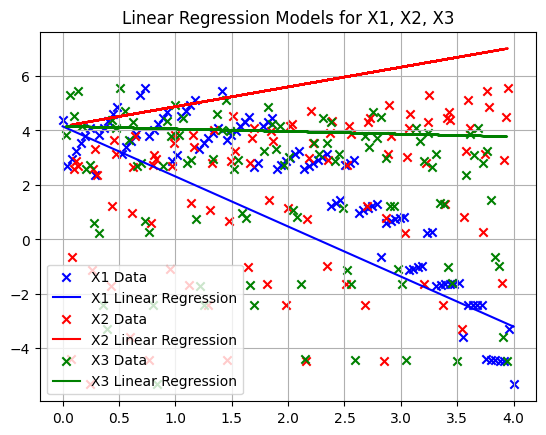

In [31]:
plt.scatter(x_1[:, 1], y, color = 'blue', marker = 'x', label = 'X1 Data')
plt.plot(x_1[:, 1], x_1.dot(theta1), color = 'blue', label = 'X1 Linear Regression')
plt.scatter(x_2[:, 1], y, color = 'red', marker = 'x', label = 'X2 Data')
plt.plot(x_2[:, 1], x_2.dot(theta2), color = 'red', label = 'X2 Linear Regression')
plt.scatter(x_3[:, 1], y, color = 'green', marker = 'x', label = 'X3 Data')
plt.plot(x_3[:, 1], x_3.dot(theta3), color = 'green', label = 'X3 Linear Regression')

plt.title("Linear Regression Models for X1, X2, X3")
plt.grid()
plt.legend()



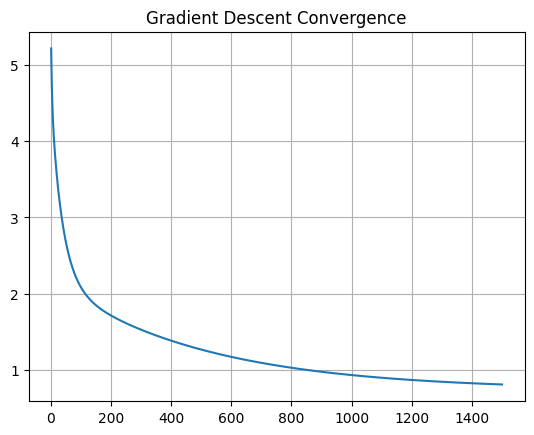

In [32]:
plt.plot(range(1, iterations + 1), costhistory)
plt.title("Gradient Descent Convergence")
plt.grid()

In [33]:
x1a = np.array([1, 1, 1, 1])
x2a = np.array([1, 2, 0, 4])
x3a = np.array([1, 3, 2, 1])

pred1 = x1a.dot(theta)
pred2 = x2a.dot(theta)
pred3 = x3a.dot(theta)

print("X1 predicted output: " , pred1)
print("X2 predicted output: " , pred2)
print("X3 predicted output: " , pred3)

X1 predicted output:  2.9413640816645295
X2 predicted output:  0.09179843075891586
X3 predicted output:  -0.012755552822328889
